In [24]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
n_task_per_file = 20
n_files = 10
base_dir = "toy_eg_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [20]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [21]:
coverage_df

,0.5,1,2,Tree val,Naive
0,0.833333,0.333333,1.000000,1.0,0.75
1,1.000000,1.000000,0.333333,1.0,1.00
2,0.750000,1.000000,0.250000,1.0,0.75
3,1.000000,0.714286,1.000000,1.0,0.75
4,1.000000,1.000000,1.000000,1.0,1.00
...,...,...,...,...,...
15,1.000000,1.000000,1.000000,1.0,1.00
16,0.714286,1.000000,1.000000,1.0,1.00
17,1.000000,1.000000,1.000000,1.0,0.80
18,1.000000,1.000000,1.000000,0.8,1.00


In [22]:
length_df

,0.5,1,2,Tree val,Naive
0,468.086778,469.630374,16.268731,6.817839,2.902599
1,14.908117,24.851310,27.677324,7.928458,2.870098
2,8.708438,7.774628,10.416455,11.826409,2.984807
3,12.759477,17.413599,9.378024,6.000782,2.920184
4,20.610776,11.173395,11.210829,15.849039,2.885806
...,...,...,...,...,...
15,16.199849,11.045308,19.971899,4.178326,2.828077
16,20.525230,19.795334,17.980180,13.223048,2.910631
17,25.973327,25.007446,16.082010,36.780288,3.199150
18,19.585070,19.661635,19.871785,17.918218,3.144896


In [23]:
MSE_df

,0.5,1,2,Tree val,Naive
0,5.558553,5.252854,4.826111,5.556761,5.556761
1,6.803843,7.377618,6.803843,6.765786,6.765786
2,6.332482,6.077339,6.165911,6.165911,6.165911
3,6.216000,6.820287,5.832706,6.036269,6.036269
4,5.652127,5.303127,5.557050,4.917355,4.917355
...,...,...,...,...,...
15,6.352013,6.537403,6.462733,6.132785,6.132785
16,6.425742,6.615055,6.717985,5.273067,5.273067
17,5.908778,5.106653,4.069402,3.808466,3.808466
18,6.475207,6.441557,6.545057,4.680464,4.680464


In [35]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,100)
        elif metric == "MSE":
            axes[i].set_ylim(0,10)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

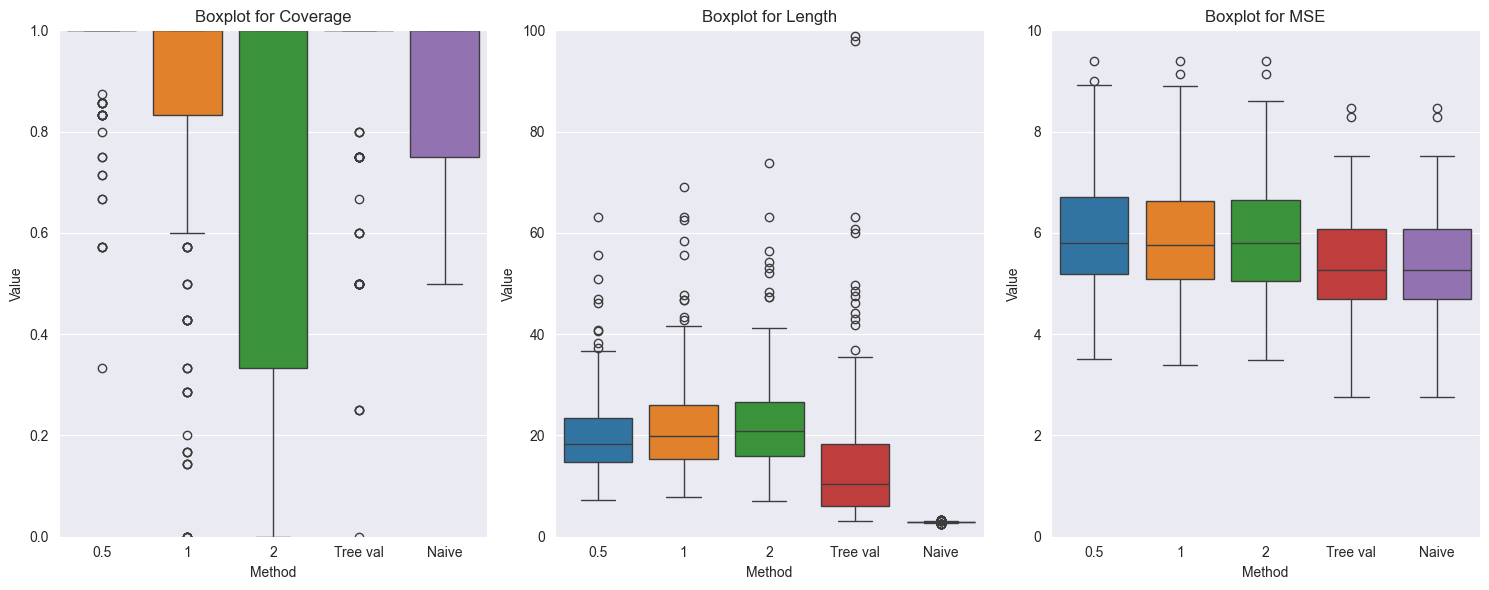

In [36]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])